In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import missingno
%matplotlib inline


In [3]:
df = pd.read_csv("automobile.txt", sep=",")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Check for Missing Data

C:\Users\Nabeel\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


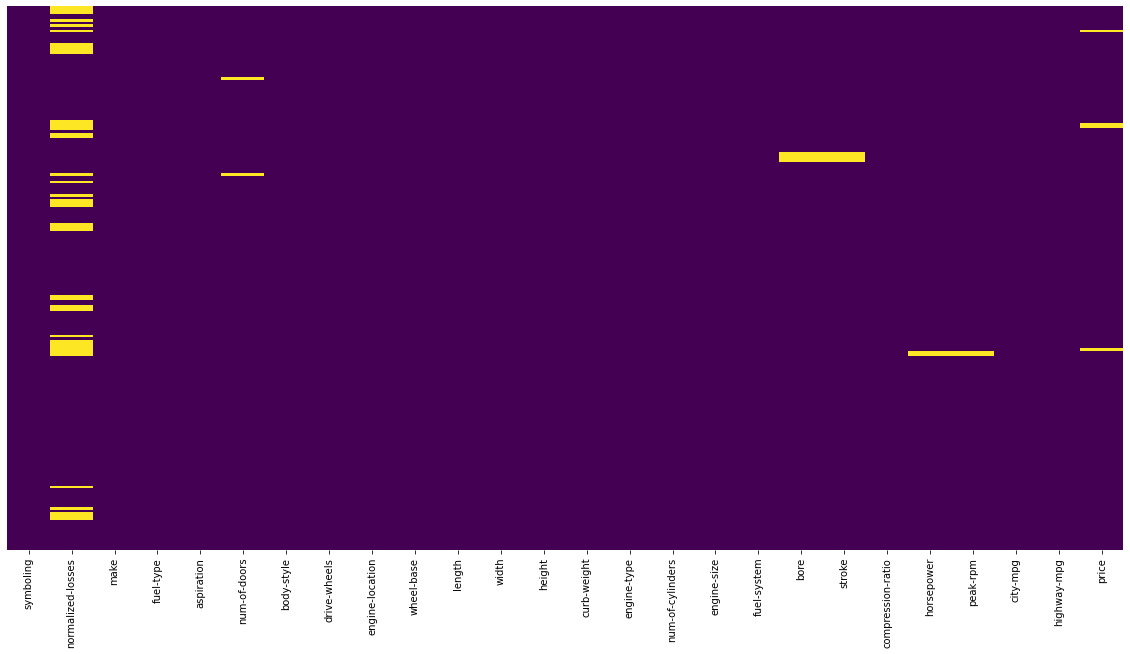

In [7]:
ax = plt.figure(figsize=(20, 10))

ax = sns.heatmap(df == "?", yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
for column in df:
    for row in range(len(df[column])):
        if df.loc[:,column].iloc[row] == "?":
            df.loc[:,column].iloc[row] = np.nan



C:\Users\Nabeel\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


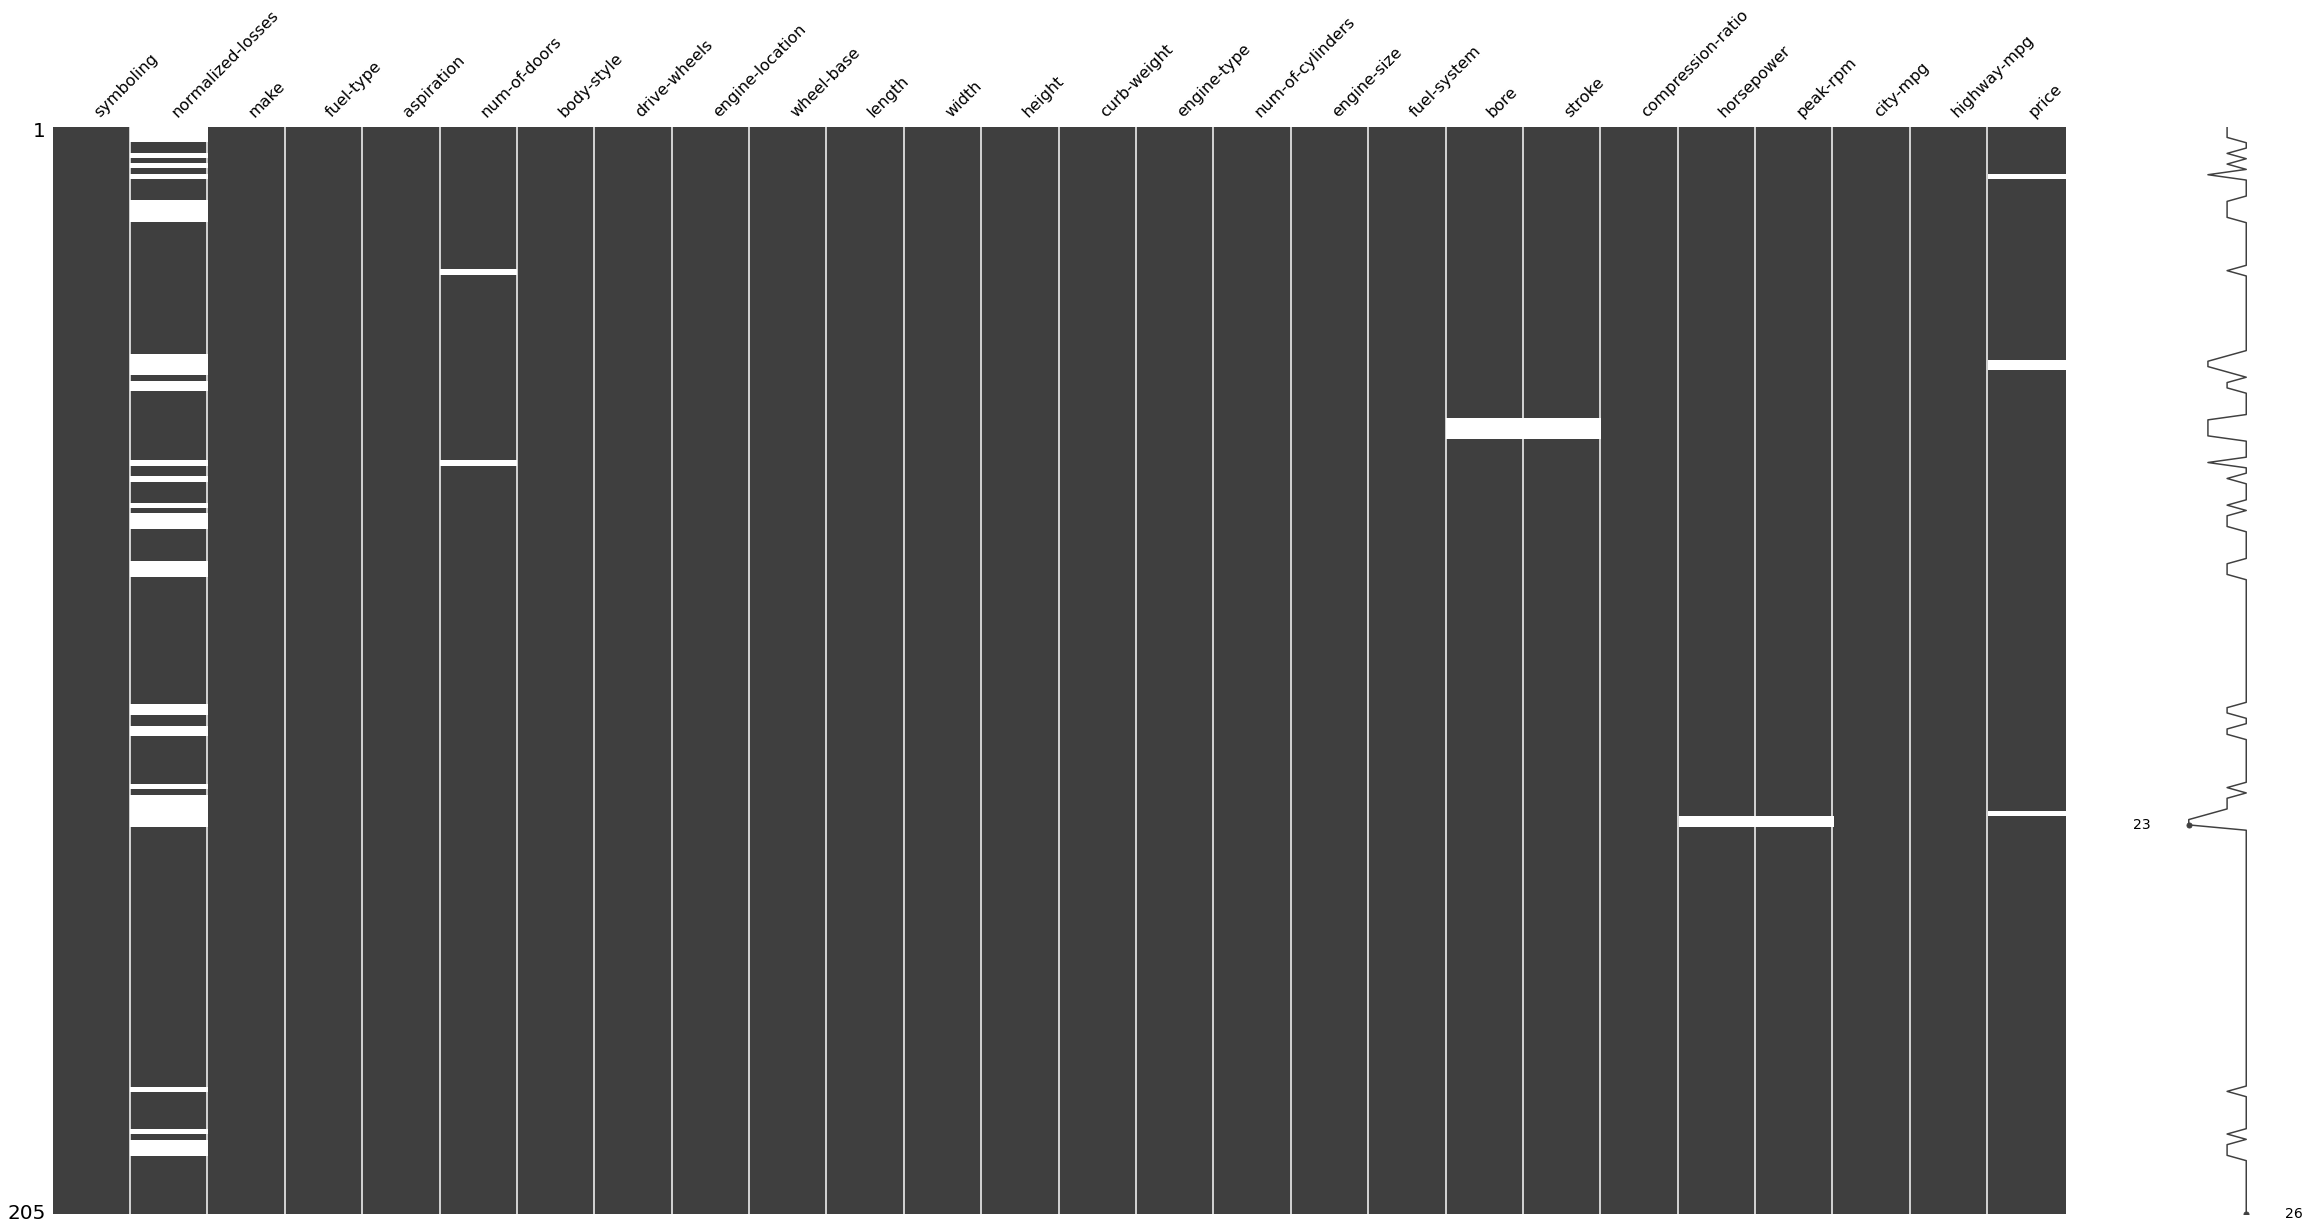

In [9]:
missingno.matrix(df, figsize = (40,20))

## Number of Doors

In [10]:
body_doors = {
"convertible": "two",    
"hatchback": "two",  
"sedan": "four",     
"wagon": "four", 
"hardtop": "two" 
}    
    
for num in range(len(df["num-of-doors"])):
    value = df["num-of-doors"].iloc[num]\
    
    if pd.isnull(value) == True:

        #column index for country is 1
        body_style = df["body-style"].iloc[num]

        #sets median value to dataframe based on points and country
        df.loc[num, "num-of-doors"] = body_doors[body_style]

        

In [11]:
#Check if code works if nothing shows up in dataframe

df[df["num-of-doors"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [12]:
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in cols:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)


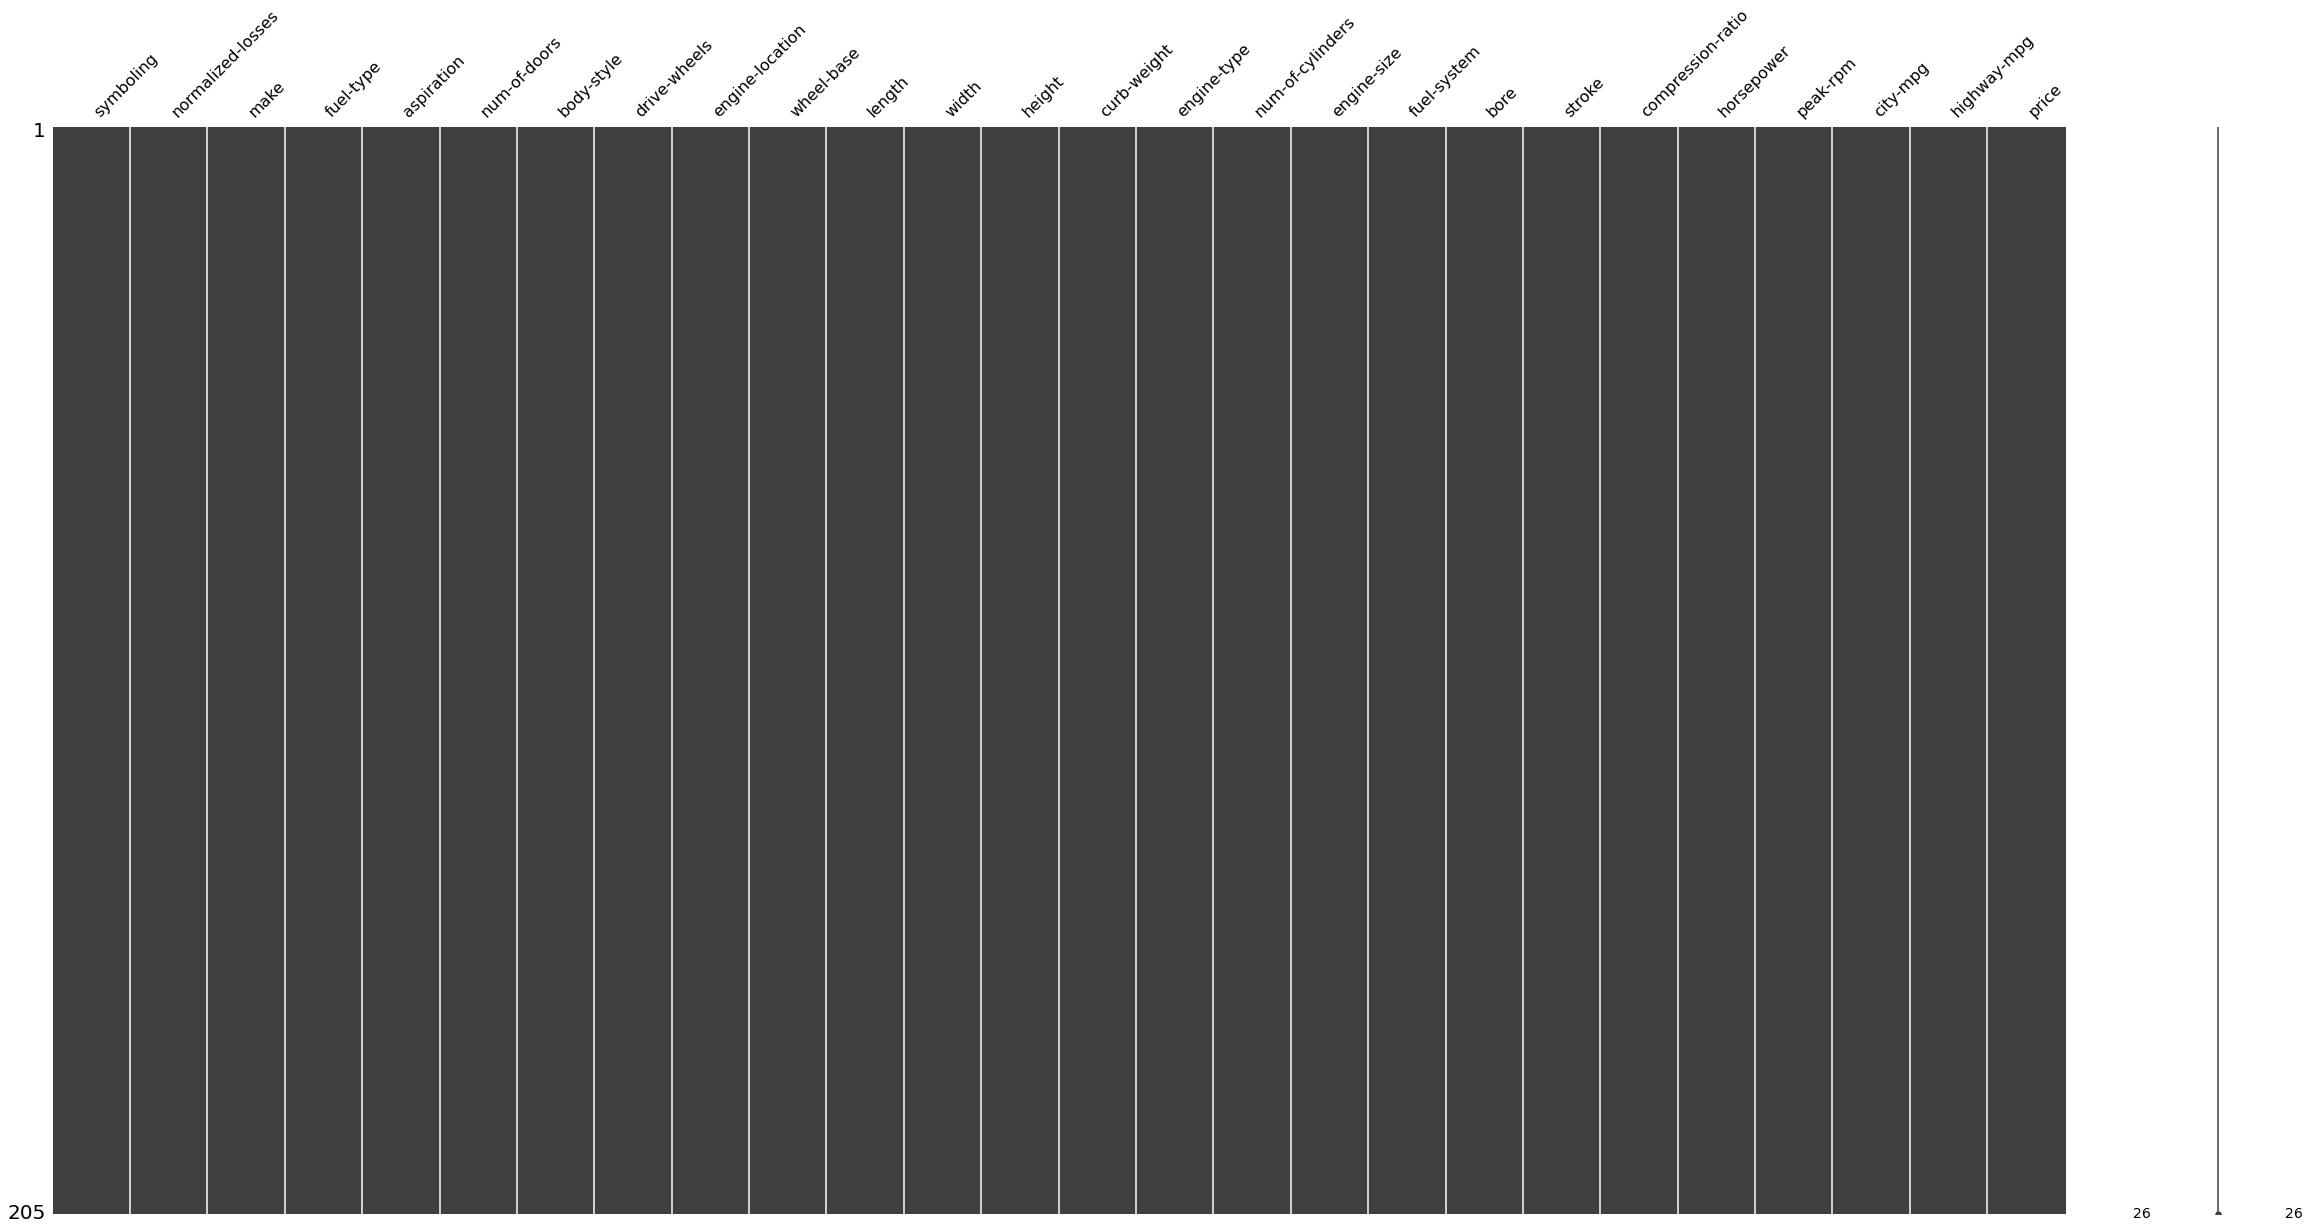

In [12]:
missingno.matrix(df, figsize = (40,20))

In [13]:
df.drop_duplicates(keep = 'first')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Number of Car Types 

([<matplotlib.axis.XTick at 0x1251ad77048>,
 <a list of 11 Text major ticklabel objects>)

<Figure size 1440x576 with 0 Axes>

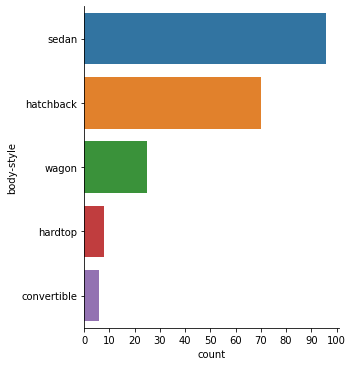

In [50]:
ax = plt.figure(figsize=(20, 8))

order = df['body-style'].value_counts().index

ax = sns.catplot(data = df, y =  "body-style", kind = "count", order = order)

plt.xticks([num for num in range(0,110,10)])

# Price

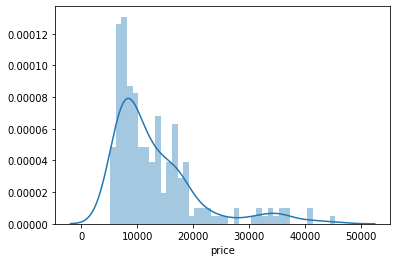

In [36]:
sns.distplot(df["price"].dropna().astype("float"), bins = 40)


# Make vs Price

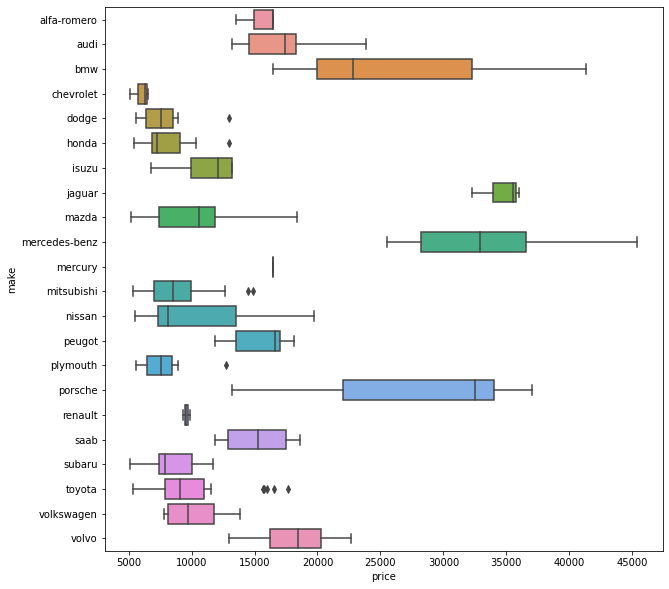

In [15]:
ax = plt.figure(figsize=(10, 10))

# a = df.groupby("country").median().sort_values("points", ascending = False)
# order = a.index.tolist() 

df_engine_rpm = df[["make", "price"]]



ax = sns.boxplot(data= df_engine_rpm, x="price", y="make")

In [45]:
df[df.price > 40000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,0,122.0,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0


# Price vs Body Style

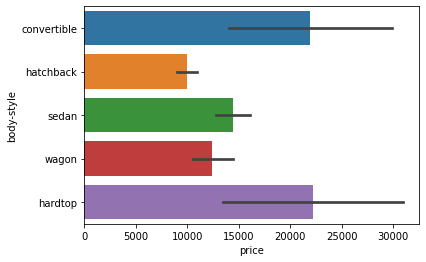

In [159]:
sns.barplot(data = df, x = "price", y = "body-style")

# Body Style vs No of Doors

<Figure size 864x864 with 0 Axes>

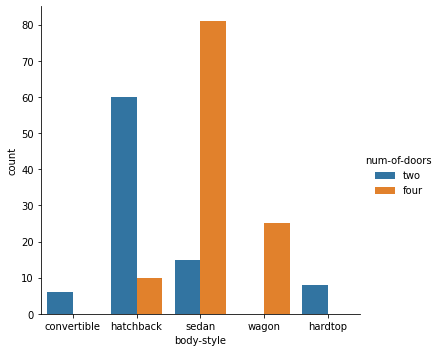

In [24]:
ax = plt.figure(figsize=(12, 12))
ax =sns.catplot(data = df, x = "body-style", kind = "count", hue = "num-of-doors")

# Body Style vs No of Doors vs Fuel Type

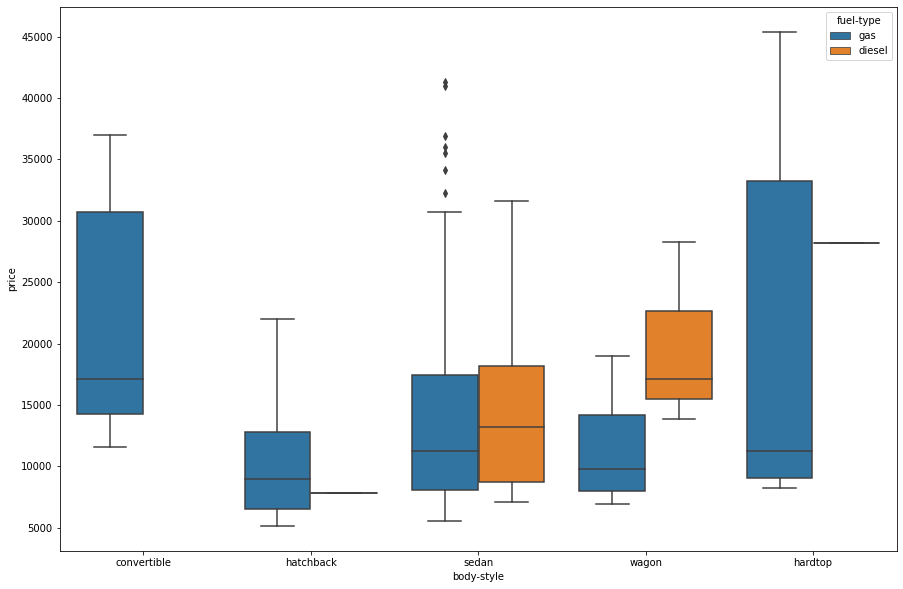

In [35]:
ax = plt.figure(figsize=(15, 10))

ax = sns.boxplot(data=df, x="body-style", y="price", hue="fuel-type")

# Price vs number of cylinders

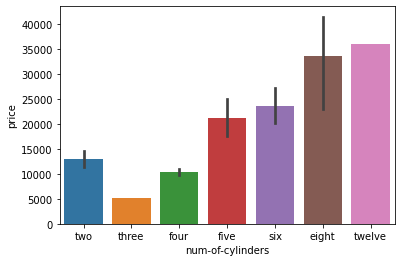

In [25]:
order = ["two", "three", "four", "five", "six", "eight", "twelve"]

sns.barplot(data = df, x = "num-of-cylinders", y = "price", order = order)

In [40]:
#Check cars with two cylinders

df[df["num-of-cylinders"] == "two"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,3.255423,9.4,135.0,6000.0,16,23,15645.0


In [42]:
df[df["num-of-cylinders"] == "twelve"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0


# Fuel vs Price

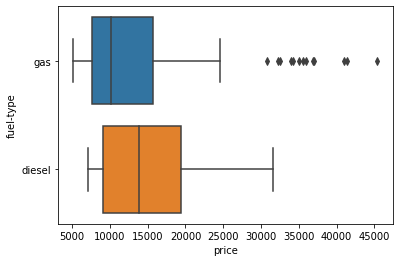

In [131]:
sns.boxplot(x='price',y='fuel-type',data= df)

# No of Doors and Price

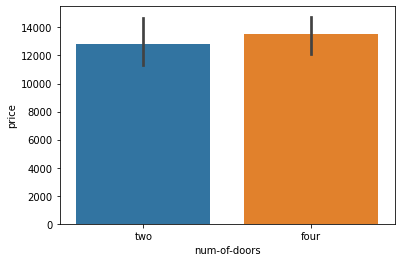

In [47]:
sns.barplot(data = df, x = "num-of-doors", y = "price")

In [ ]:
No significant difference

# Price vs Engine-Type

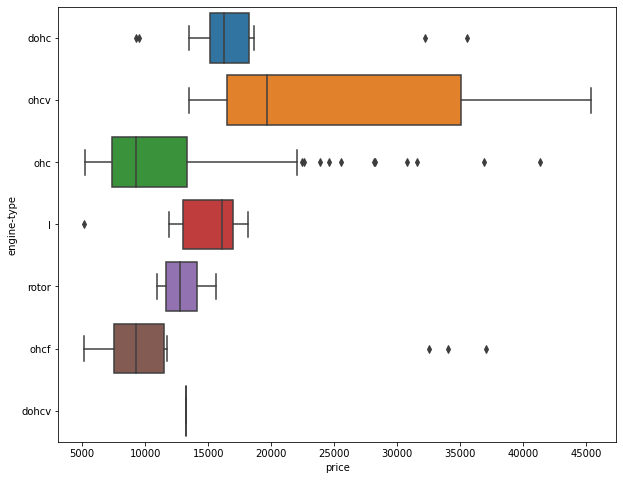

In [22]:
ax = plt.figure(figsize=(10, 8))
sns.boxplot(y='engine-type',x='price',data=df);

In [23]:
df[df["engine-type"] == "rotor"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,3.255423,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,3.255423,9.4,135.0,6000.0,16,23,15645.0


In [25]:
df[df["engine-type"] == "ohcv"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
49,0,122.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0
71,-1,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
73,0,122.0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,122.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
101,0,128.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0
102,0,108.0,nissan,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,14399.0
103,0,108.0,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152.0,5200.0,19,25,13499.0
104,3,194.0,nissan,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0


In [27]:
df[df["engine-type"] == "dohcv"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,13207.129353


# Price vs Aspiration

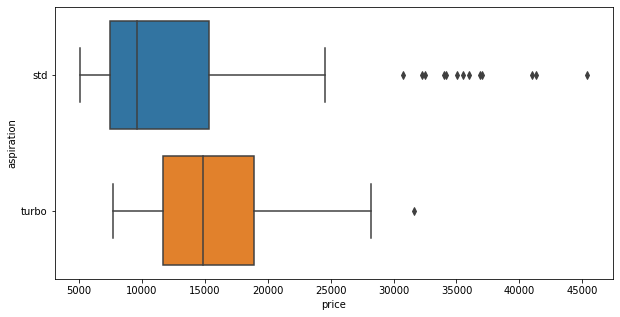

In [14]:
ax = plt.figure(figsize=(10, 5))
sns.boxplot(y='aspiration',x='price',data=df);

# Price vs Drive-wheels

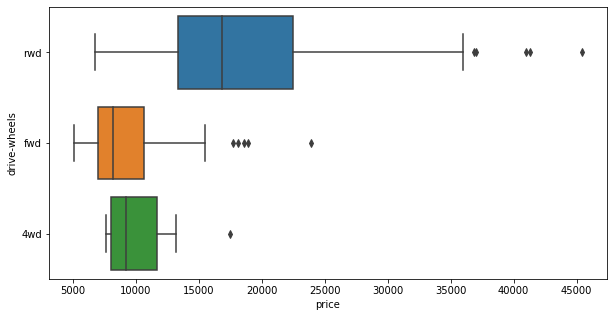

In [15]:
ax = plt.figure(figsize=(10, 5))
sns.boxplot(y='drive-wheels',x='price',data=df);

In [21]:
df[df["drive-wheels"] == "fwd"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,NaN,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845


In [19]:
df[df["drive-wheels"] == "4wd"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
140,2,83,subaru,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603
144,0,102,subaru,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233
145,0,102,subaru,gas,turbo,four,sedan,4wd,front,97.0,...,108,mpfi,3.62,2.64,7.7,111,4800,24,29,11259
148,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
149,0,85,subaru,gas,turbo,four,wagon,4wd,front,96.9,...,108,mpfi,3.62,2.64,7.7,111,4800,23,23,11694
154,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778


# Price vs Engine Location

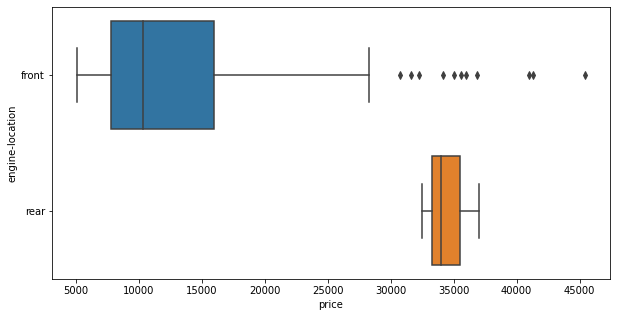

In [16]:
ax = plt.figure(figsize=(10, 5))
sns.boxplot(y='engine-location',x='price',data=df);

In [18]:
df[df["engine-location"] == "rear"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,32528.0
127,3,122.0,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,34028.0
128,3,122.0,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207.0,5900.0,17,25,37028.0


# Body Style vs Engine Location

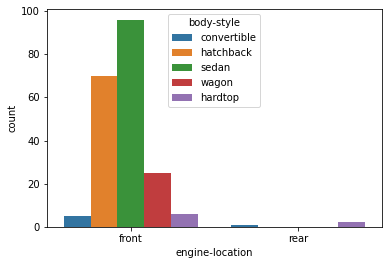

In [25]:
sns.countplot(data = df, x= 'engine-location', hue = 'body-style')

# Boyd Style vs Peak Rpm

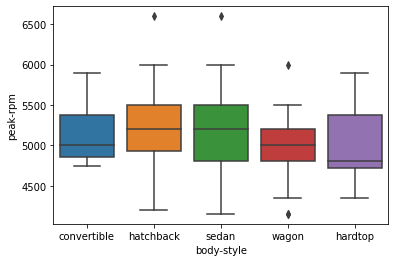

In [51]:
sns.boxplot(data = df, x= 'body-style', y = 'peak-rpm')

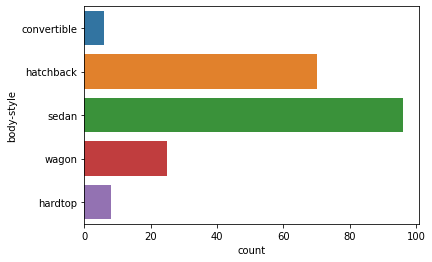

In [17]:
ax = sns.countplot(data = df, y = 'body-style')


# Body Style vs Drive Wheel

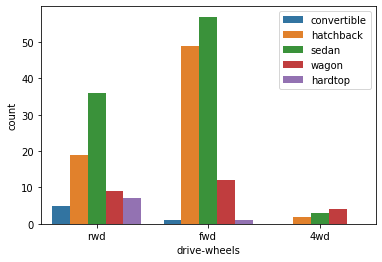

In [68]:
ax = sns.countplot(data = df, x = 'drive-wheels', hue = "body-style")
plt.legend(loc='upper right')

# Boyd Style vs Aspiration

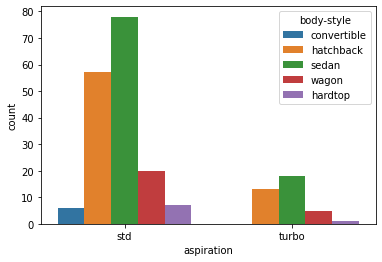

In [61]:
sns.countplot(data = df, x = 'aspiration', hue = "body-style")

# Body Style vs Fuel System

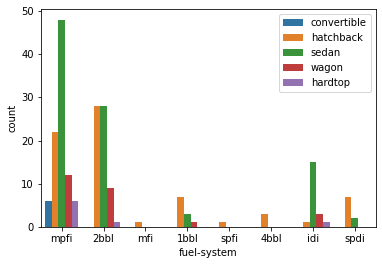

In [72]:
sns.countplot(data = df, x = 'fuel-system', hue = "body-style")
plt.legend(loc='upper right')

In [51]:
df[df["body-style"] == "hatchback"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,13207.129353
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.000000
19,1,98.0,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295.000000
21,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,9988.000000
177,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92.0,4200.0,27,32,11248.000000
178,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161.0,5200.0,20,24,16558.000000
179,3,197.0,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161.0,5200.0,19,24,15998.000000


# Body Style vs Highway-mpg

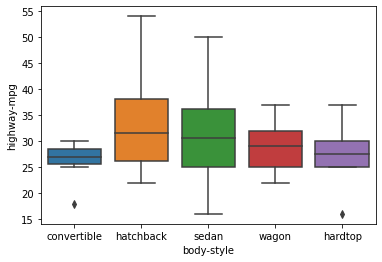

In [66]:
sns.boxplot(data = df, x= 'body-style', y = 'highway-mpg')

# Body style vs Make

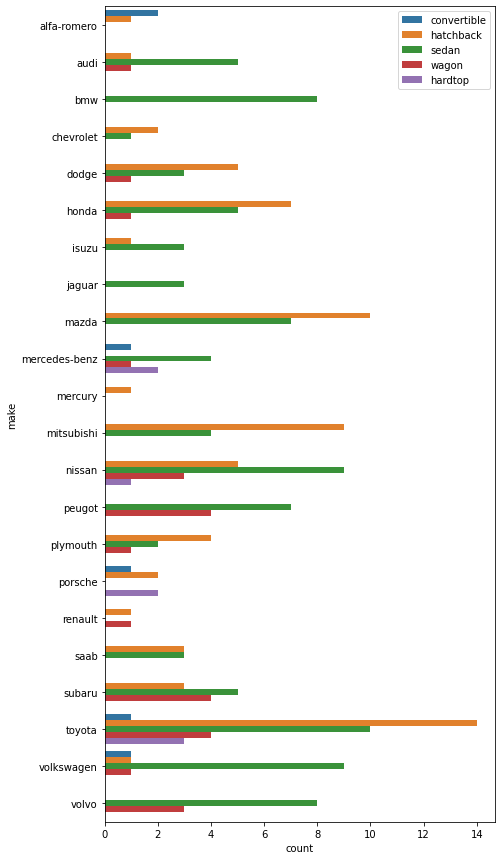

In [71]:
ax = plt.figure(figsize=(7, 15))
sns.countplot(data = df, y = 'make', hue = "body-style")
plt.legend(loc='upper right')

ax.savefig("output.png")

# Gas and Body Style

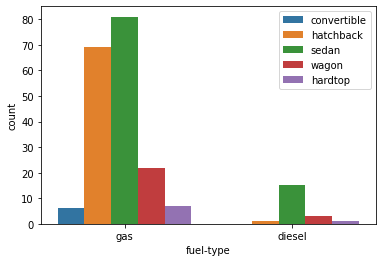

In [72]:
sns.countplot(data = df, x = 'fuel-type', hue = "body-style")
plt.legend(loc='upper right')

In [85]:
df[df["fuel-type"] == "diesel"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,122.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,122.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


# Linear Correlation for numerical data

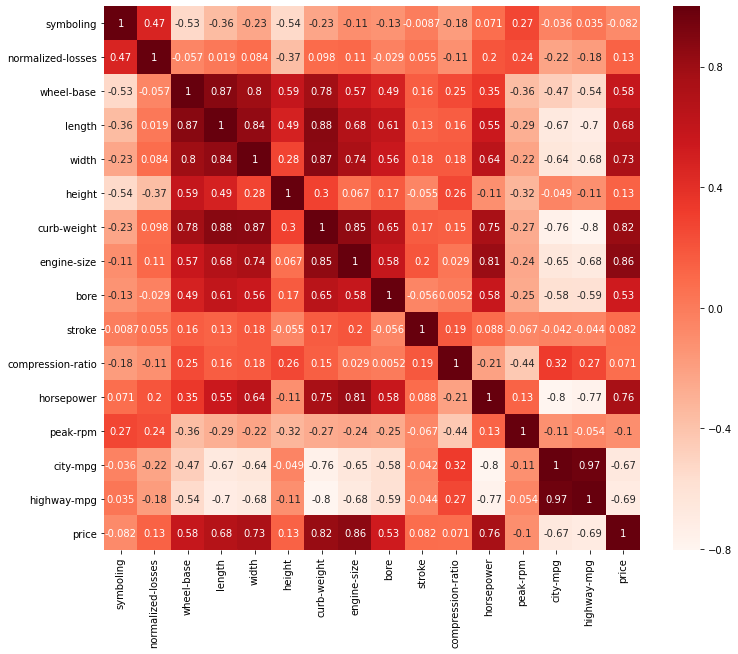

In [151]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='Reds')

# Postive Linear Correlation for numerical data

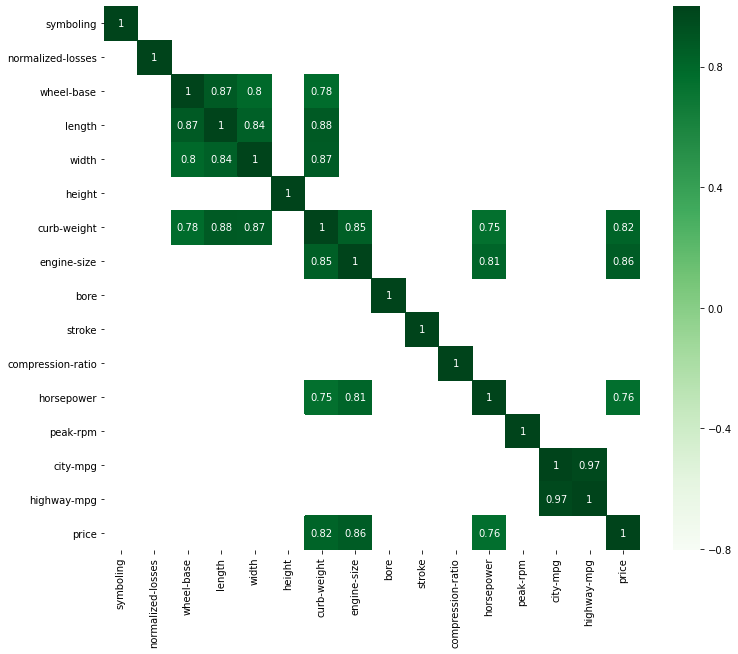

In [29]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='Greens', mask = (df.corr() <= 0.75))

# Negative Linear Correlation for numerical data

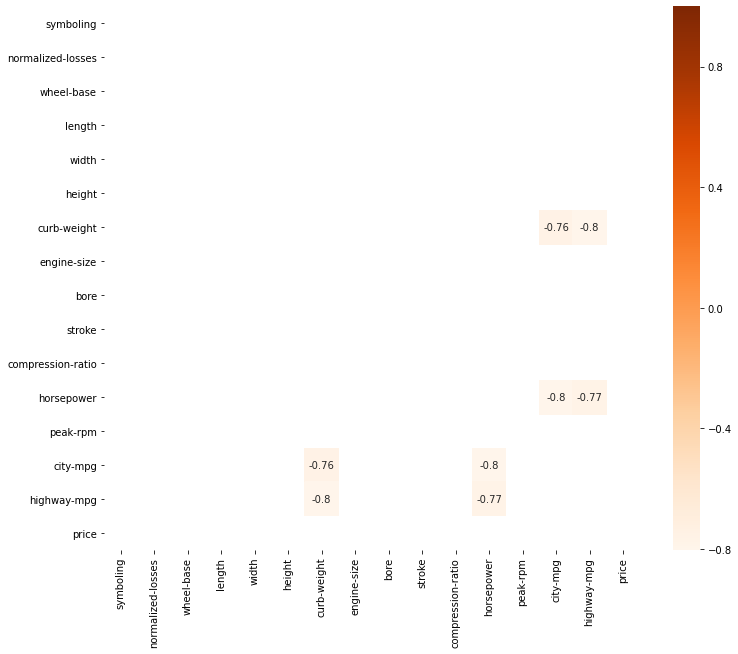

In [80]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(),annot = True, cmap='Oranges', mask = (df.corr() >= -0.75))

# References

https://stackoverflow.com/questions/24775648/element-wise-logical-or-in-pandas
https://stackoverflow.com/questions/59241052/ordering-a-python-seaborn-barplot-by-ascending-or-descending
https://www.codegrepper.com/code-examples/typescript/pandas+add+multiple+lists+to+dataframe
https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy
https://www.kaggle.com/gayatrirao98/exploratory-data-analysis  
https://www.w3schools.com/python/python_lists_loop.asp